In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="redacted")
project = rf.workspace("edge-4k8xw").project("map-0.5")
version = project.version(18)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.7 MB/s eta 0:00:00:00:010:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2


Extracting Dataset Version Zip to mAP-0.5-18 in yolov8:: 100%|██████████| 1676/1676 [00:00<00:00, 7077.06it/s]


In [2]:
# Import model
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.8/744.8 kB 26.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import yaml
import io

sns.set_style('darkgrid')

%matplotlib inline

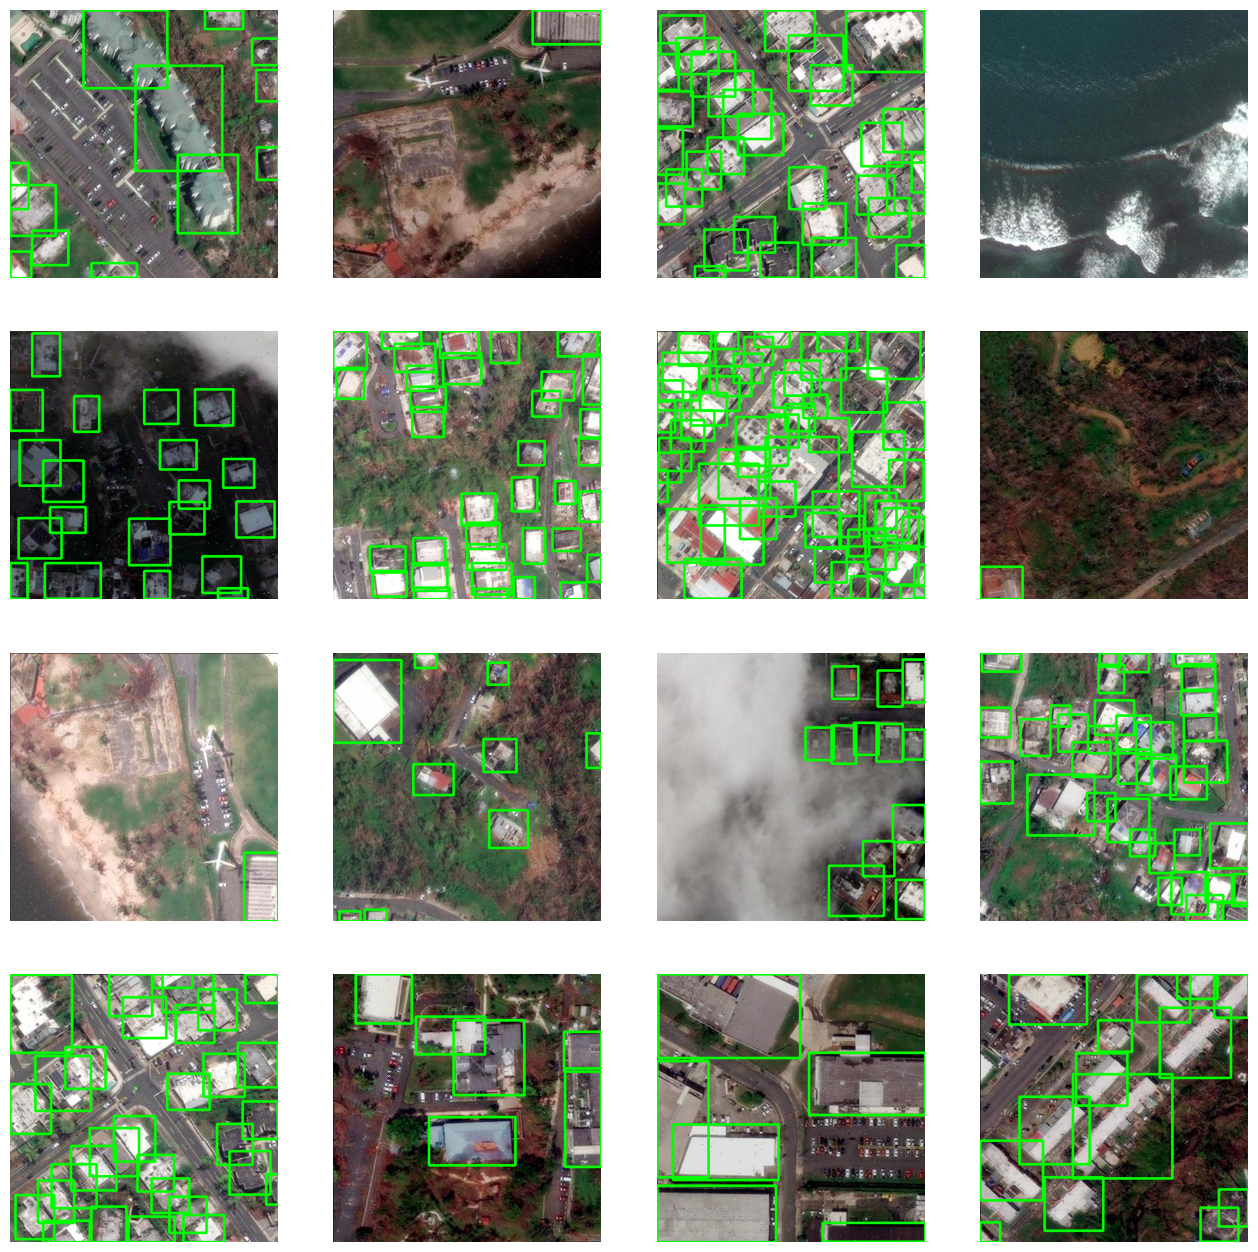

In [4]:
# Define the paths to the images and labels directories
train_images = "/kaggle/working/mAP-0.5-18/train/images"
train_labels = "/kaggle/working/mAP-0.5-18/train/labels"

test_images = "/kaggle/working/mAP-0.5-18/test/images"
test_labels = "/kaggle/working/mAP-0.5-18/test/labels"

val_images = "/kaggle/working/mAP-0.5-18/valid/images"
val_labels = "/kaggle/working/mAP-0.5-18/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [5]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/working/mAP-0.5-18/train/images/tile_54_42_jpg.rf.d896cb33270429c98273dd19c8991cf9.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 512x512 and 3 channels.


In [6]:
# Verify .yaml file
with open("/kaggle/working/mAP-0.5-18/data.yaml") as stream:
    try:
        print(yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

{'names': ['0', '1', '2', '3'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'map-0.5', 'url': 'https://universe.roboflow.com/edge-4k8xw/map-0.5/dataset/18', 'version': 18, 'workspace': 'edge-4k8xw'}, 'test': '../test/images', 'train': 'mAP-0.5-18/train/images', 'val': 'mAP-0.5-18/valid/images'}


In [8]:
# Rewrite .yaml file

# Define data
data_yaml = {'names': ['0', '1', '2', '3'], 
           'nc': 4, 
           'roboflow': {'license': 'CC BY 4.0', 'project': 'map-0.5', 'url': 'https://universe.roboflow.com/edge-4k8xw/map-0.5/dataset/18', 'version': 18, 'workspace': 'edge-4k8xw'},
           'test': '/kaggle/working/mAP-0.5-18/test/images', 
           'train': '/kaggle/working/mAP-0.5-18/train/images', 
           'val': '/kaggle/working/mAP-0.5-18/valid/images'
          }

# Write YAML file
with io.open('dataset.yaml', 'w', encoding='utf8') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=False, allow_unicode=True)

# Read YAML file
with open("dataset.yaml", 'r') as stream:
    data_loaded = yaml.safe_load(stream)

In [9]:
# Re-verify .yaml file
with open("/kaggle/working/dataset.yaml") as stream:
    try:
        print(yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

{'names': ['0', '1', '2', '3'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'map-0.5', 'url': 'https://universe.roboflow.com/edge-4k8xw/map-0.5/dataset/18', 'version': 18, 'workspace': 'edge-4k8xw'}, 'test': '/kaggle/working/mAP-0.5-18/test/images', 'train': '/kaggle/working/mAP-0.5-18/train/images', 'val': '/kaggle/working/mAP-0.5-18/valid/images'}


In [10]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/working/dataset.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 131M/131M [00:02<00:00, 46.0MB/s] 


Ultralytics YOLOv8.1.41 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/dataset.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 40.0MB/s]
2024-04-01 18:44:54,885	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-01 18:44:55,790	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-01 18:44:58.374465: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 18:44:58.374587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 18:44:58.536530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 146MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/mAP-0.5-18/train/labels... 624 images, 12 backgrounds, 0 corrupt: 100%|██████████| 624/624 [00:00<00:00, 976.24it/s]

train: WARNING ⚠️ /kaggle/working/mAP-0.5-18/train/images/tile_7_34_jpg.rf.2260858a671dc228727c3db3dc96e354.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/mAP-0.5-18/train/images/tile_7_34_jpg.rf.a07ac9ce5efe4d79a08cb956c08902be.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/mAP-0.5-18/train/images/tile_7_34_jpg.rf.cb47c710bccffde257120683759c83ff.jpg: 1 duplicate labels removed
train: New cache created: /kaggle/working/mAP-0.5-18/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/mAP-0.5-18/valid/labels... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 1273.40it/s]

val: New cache created: /kaggle/working/mAP-0.5-18/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.08G      1.308      1.704      1.376        218        512: 100%|██████████| 78/78 [00:36<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all         53        932      0.348       0.51      0.404       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.33G      1.181       1.25      1.323        140        512: 100%|██████████| 78/78 [00:30<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all         53        932      0.364      0.554      0.417      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.38G      1.267      1.241      1.373        280        512: 100%|██████████| 78/78 [00:31<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         53        932      0.348      0.425      0.336      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.41G      1.232      1.284      1.337        260        512: 100%|██████████| 78/78 [00:32<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all         53        932      0.482      0.366      0.397      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.36G      1.179      1.194      1.305        148        512: 100%|██████████| 78/78 [00:31<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         53        932      0.803      0.325       0.46      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.43G      1.134      1.095      1.268        176        512: 100%|██████████| 78/78 [00:31<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         53        932      0.516      0.519      0.535      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.47G       1.12      1.095      1.259        157        512: 100%|██████████| 78/78 [00:31<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         53        932       0.68      0.481      0.521      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.39G      1.064      1.002      1.237        205        512: 100%|██████████| 78/78 [00:31<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         53        932      0.456      0.641       0.57      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.37G      1.038     0.9679      1.209        219        512: 100%|██████████| 78/78 [00:31<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         53        932       0.51      0.527      0.546      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.39G      1.053      1.002      1.251        114        512: 100%|██████████| 78/78 [00:31<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all         53        932      0.521      0.594      0.592      0.404


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.39G     0.9991     0.9268      1.244         96        512: 100%|██████████| 78/78 [00:34<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         53        932      0.457      0.612      0.562      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       6.4G     0.9748     0.8781      1.224        135        512: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         53        932      0.587      0.524      0.559      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.36G     0.9753     0.8979      1.236        149        512: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all         53        932      0.489      0.595      0.532      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       6.4G     0.9379     0.8484      1.216        127        512: 100%|██████████| 78/78 [00:31<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         53        932      0.488      0.665      0.604      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.41G     0.9256     0.8025      1.198         99        512: 100%|██████████| 78/78 [00:31<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         53        932      0.487      0.642      0.587      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       6.4G     0.9221     0.8126      1.189         64        512: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all         53        932      0.592      0.614      0.621      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.33G     0.8997     0.7485      1.179        135        512: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all         53        932      0.537      0.631       0.61      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.35G     0.8596     0.7316      1.155        146        512: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all         53        932      0.555      0.645      0.638      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.43G     0.8626     0.7003      1.153         72        512: 100%|██████████| 78/78 [00:31<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all         53        932      0.606      0.605      0.625      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       6.4G     0.8126     0.6551      1.123        112        512: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all         53        932      0.618      0.624      0.644      0.455



20 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.41 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.26s/it]


                   all         53        932      0.619      0.624      0.644      0.455
                     0         53        632      0.789      0.871      0.912      0.709
                     1         53        109      0.514      0.679      0.653      0.439
                     2         53        139      0.516      0.504      0.542      0.395
                     3         53         52      0.656      0.442      0.469       0.28
Speed: 0.2ms preprocess, 19.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a49e48b4910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

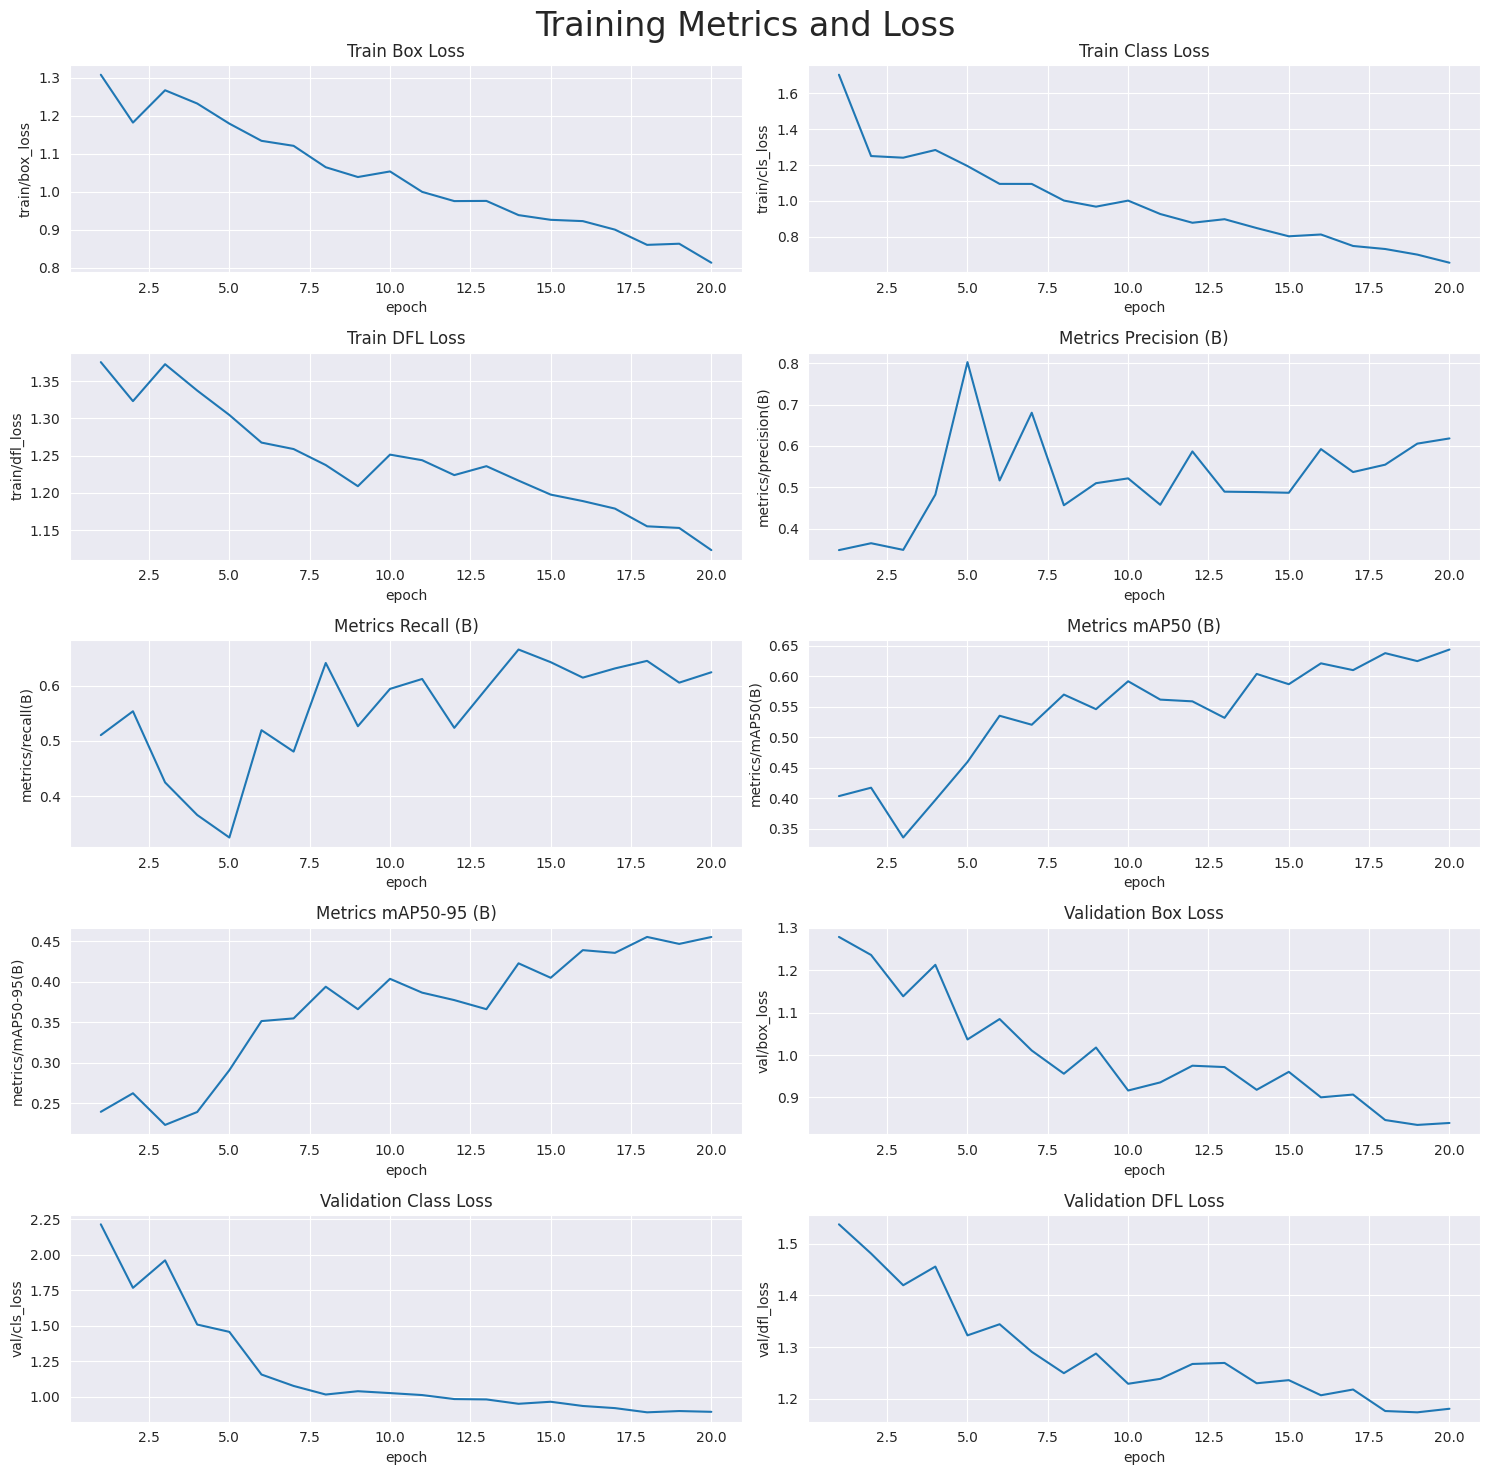

In [11]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [12]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.1.41 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/working/mAP-0.5-18/test/labels... 155 images, 0 backgrounds, 0 corrupt: 100%|██████████| 155/155 [00:00<00:00, 1070.53it/s]

val: New cache created: /kaggle/working/mAP-0.5-18/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


                   all        155       3208      0.621      0.587      0.608      0.485
                     0        155       2305      0.783      0.909        0.9      0.731
                     1        155        344      0.585      0.669      0.636       0.49
                     2        155        426      0.529      0.493      0.484      0.392
                     3        155        133      0.587      0.278      0.413      0.327
Speed: 0.2ms preprocess, 42.7ms inference, 0.0ms loss, 15.5ms postprocess per image
Results saved to runs/detect/val


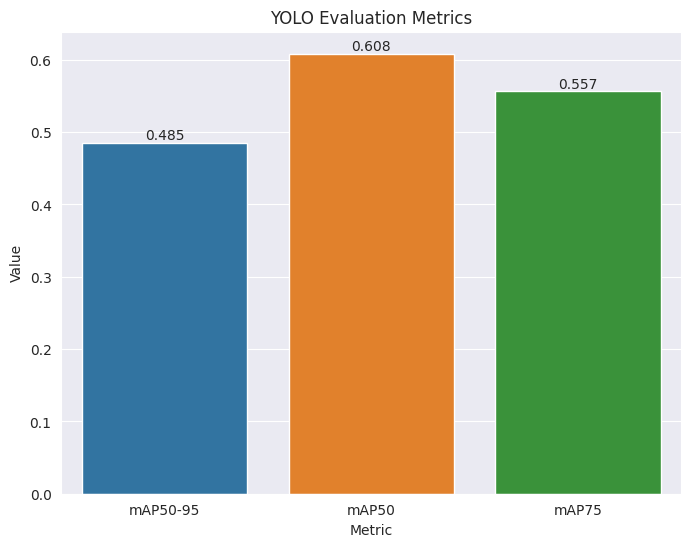

In [13]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

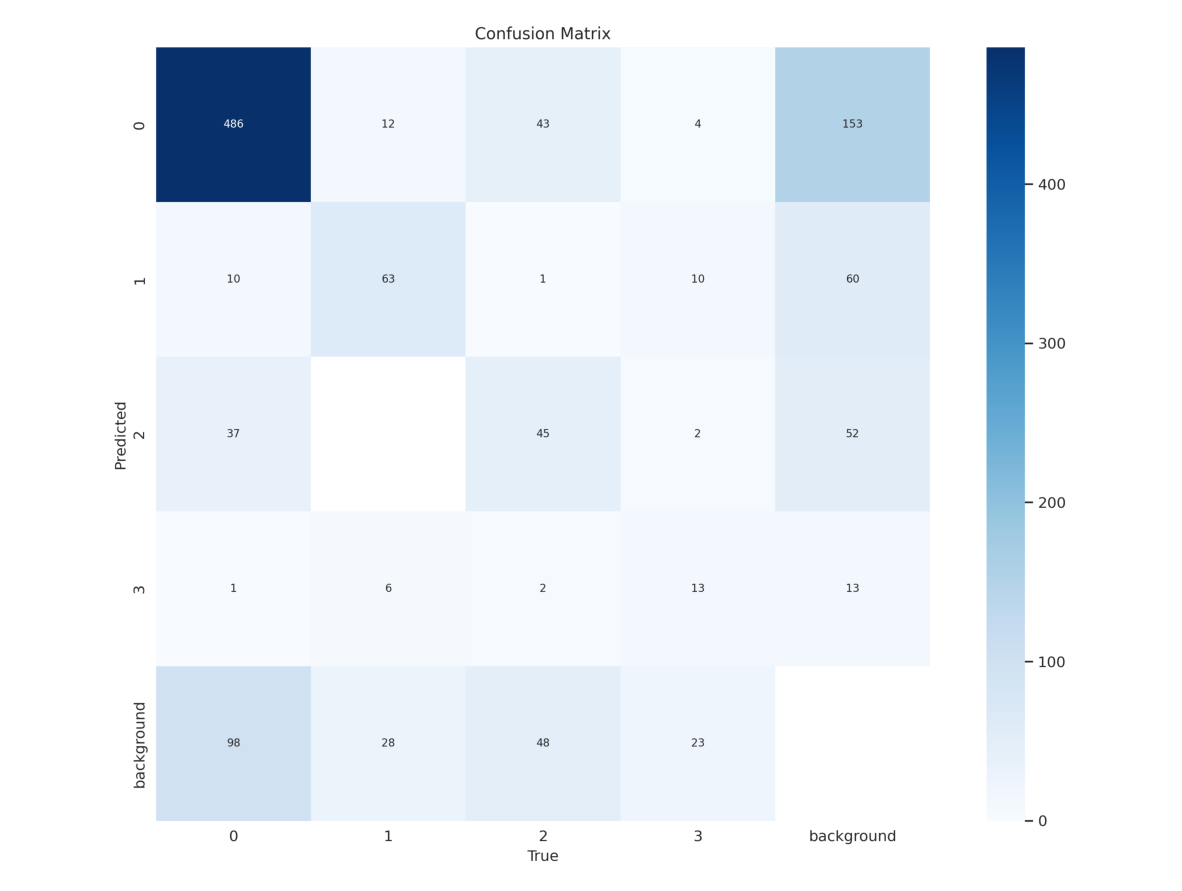

In [14]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [17]:
# Function to perform ship detections
def building_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 512x512 3 0s, 1 2, 57.1ms
Speed: 3.9ms preprocess, 57.1ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 37 0s, 5 1s, 56.9ms
Speed: 1.7ms preprocess, 56.9ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 0, 1 1, 56.9ms
Speed: 1.6ms preprocess, 56.9ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 43 0s, 4 1s, 2 2s, 36.7ms
Speed: 2.0ms preprocess, 36.7ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 5 0s, 2 1s, 2 3s, 34.9ms
Speed: 1.6ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 21 0s, 3 1s, 1 2, 1 3, 33.9ms
Speed: 1.4ms preprocess, 33.9ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 0s, 1 1, 33.8ms
Speed: 1.4ms preprocess, 33.8ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 14 0s, 7 1s, 1 3, 31.6ms
Speed: 1.7ms preprocess, 31.6ms inference, 1.6

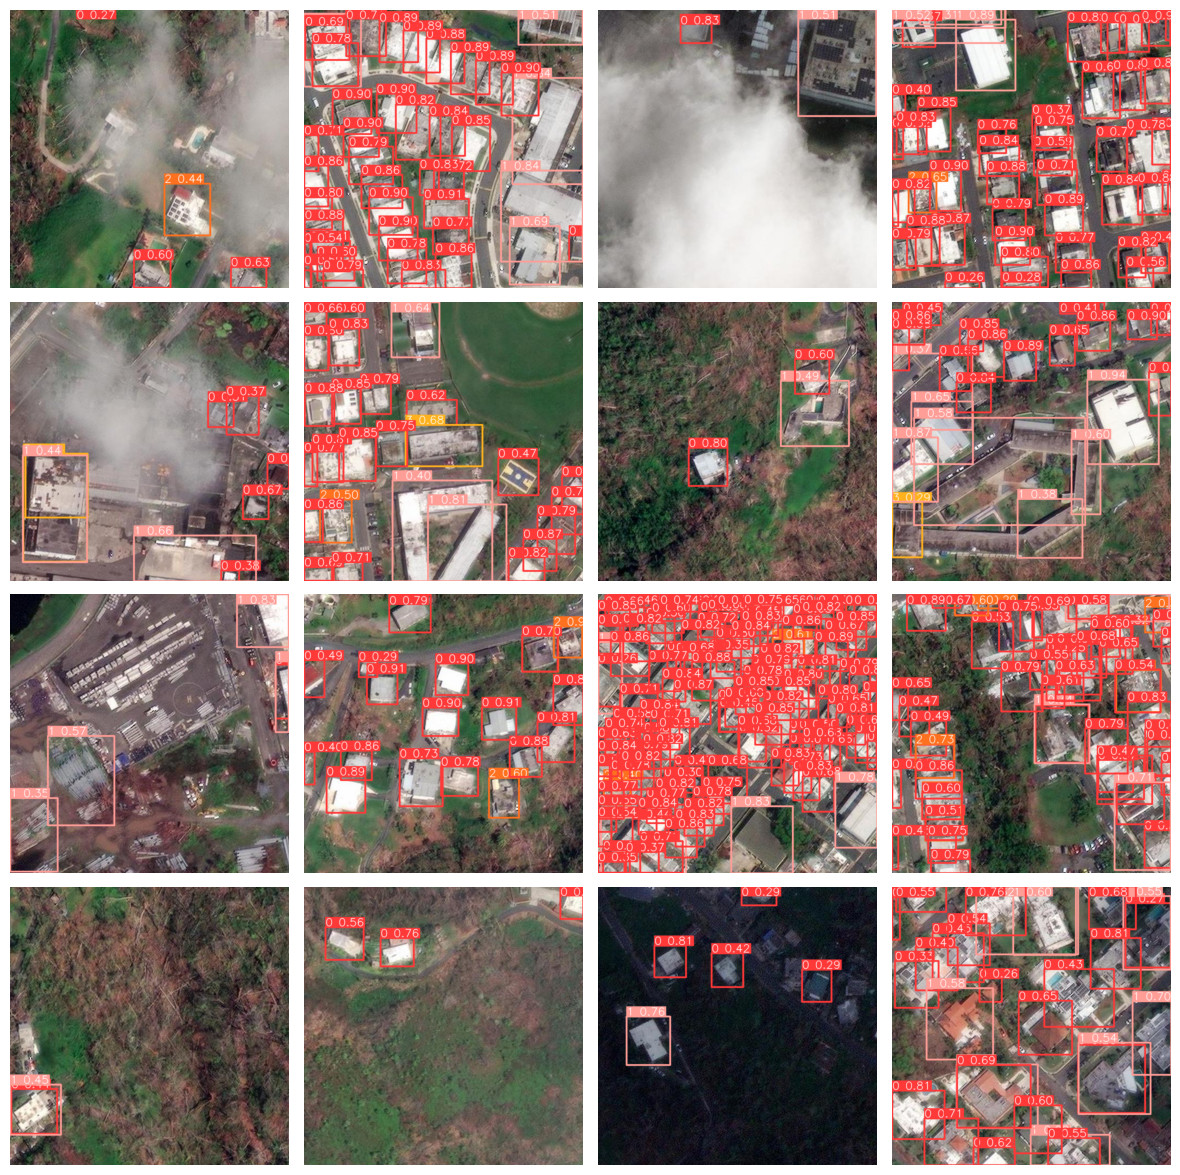

In [18]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/working/mAP-0.5-18/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = building_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)